In [35]:
import keras
import numpy as np

In [73]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=100)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=100)


In [74]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(20000, 10, input_length=100))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 100, 10)           200000    
_________________________________________________________________
flatten_26 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 1001      
Total params: 201,001
Trainable params: 201,001
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 112us/step - loss: 0.6026 - acc: 0.6963 - val_loss: 0.4429 - val_acc: 0.8160
Epoch 2/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.3490 - acc: 0.8587 - val_loss: 0.3418 - val_acc: 0.8494
Epoch 3/10
20000/20000 [==============================] - 2s 76us/step - los

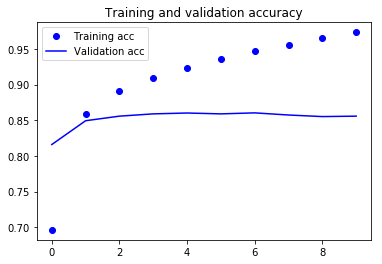

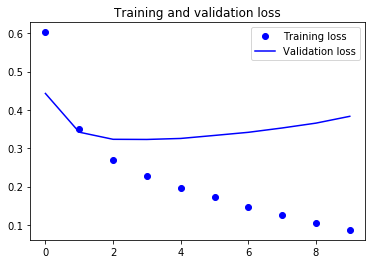

In [75]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [76]:
model.evaluate(x_test, y_test)


25000/25000 [==============================] - 1s 20us/step


[0.39574805943012237, 0.84643999999999997]